In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from math import log as ln, log2

随机变量X的熵的定义为：
$$
H(X) = -\sum_{i=1}^n p_i \; log \; p_i
$$
其中当pi=0时，定义0log0=0；当对数以2或者e为底时，熵的单位分别称为比特(bit)或纳特(nat)

In [2]:
# 定义熵计算函数
def calc_entropy(pros, base='2'):
    log = log2 if base == '2' else ln
    entropy = 0
    for pro in pros:
        if pro == 0:
            continue
        entropy -= pro * log(pro)
    return entropy

In [3]:
# 计算一个随机变量只有两个值，且概率都为0.5时的熵
calc_entropy([0.5, 0.5])

1.0

假设随机变量只取两个值1，0，则有
$$
P(X=1)=p, P(X=0)=1-p，0 \leq p \leq 1
$$
可以画出这个分布随着p的变化

In [4]:
ps = []
entropys = []
for n in range(0, 101):
    p = n / 100
    entropy = calc_entropy([p, 1-p])
    ps.append(p)
    entropys.append(entropy)

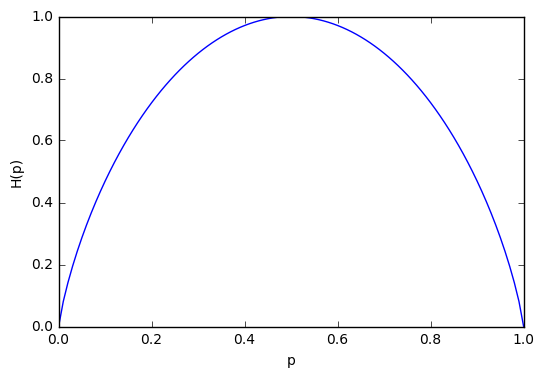

In [5]:
plt.plot(ps, entropys)
plt.xlabel('p')
plt.ylabel('H(p)')
plt.show()

首先先导入例5.1中的数据

In [6]:
import pandas as pd

In [7]:
input_data = [
    ['青年', '否', '否', '一般', '否'],
    ['青年', '否', '否', '好', '否'],
    ['青年', '是', '否', '好', '是'],
    ['青年', '是', '是', '一般', '是'],
    ['青年', '否', '否', '一般', '否'],
    ['中年', '否', '否', '一般', '否'],
    ['中年', '否', '否', '好', '否'],
    ['中年', '是', '是', '好', '是'],
    ['中年', '否', '是', '非常好', '是'],
    ['中年', '否', '是', '非常好', '是'],
    ['老年', '否', '是', '非常好', '是'],
    ['老年', '否', '是', '好', '是'],
    ['老年', '是', '否', '好', '是'],
    ['老年', '是', '否', '非常好', '是'],
    ['老年', '否', '否', '一般', '否'],
    ]
features_name = ['年龄', '有工作', '有自己的房子', '信贷情况']
data = pd.DataFrame(input_data, columns=features_name+['类别'])

In [8]:
features_name

['年龄', '有工作', '有自己的房子', '信贷情况']

In [9]:
data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


### 信息增益
条件熵表示在已知随机变量X的条件下随机变量Y的不确定性，定义为X给定条件下Y的条件概率分布的熵对X的数学期望
$$
H(Y|X) = \sum_{i=1}^n p_i \; H(Y|X=x_i) \\
p_i = P(X=x_i)
$$

In [10]:
# 以年龄特征为例子，计算给定年龄的条件下，类别的条件熵
# 年龄的取值有
feature_name = '年龄'
values_set = set(data[feature_name])
values_set

{'中年', '老年', '青年'}

In [11]:
# 当年龄为中年时，得到一个子集
value = '中年'
sub_data = data[data[feature_name] == value]
sub_data

,年龄,有工作,有自己的房子,信贷情况,类别
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [12]:
# 得到类别
labels = sub_data['类别']
print('类别')
print(labels)
print('类别的频数')
print(labels.value_counts())
print('子集中类别的概率')
pros = labels.value_counts() / len(labels)
print(pros)
# 子集的熵为
sub_HD = calc_entropy(pros.values)
print(sub_HD)

类别
5    否
6    否
7    是
8    是
9    是
Name: 类别, dtype: object
类别的频数
是    3
否    2
Name: 类别, dtype: int64
子集中类别的概率
是    0.6
否    0.4
Name: 类别, dtype: float64
0.970950594455


In [13]:
# 现在计算遍历所有取值，计算经验条件熵
def calc_feature_entropy(data, feature_name):
    values_set = sorted(set(data[feature_name]))
    all_num = len(data)
    HDA = 0
    for value in values_set:
        sub_data = data[data[feature_name] == value]
        labels = sub_data['类别']
        pros = labels.value_counts() / len(labels)
        sub_HD = calc_entropy(pros.values)
        p = len(sub_data) / all_num
        HDA += p * sub_HD
    return HDA
    
    
# 现在计算遍历所有取值，计算经验条件熵
def calc_HD(data):
    labels = data['类别']
    pros = labels.value_counts() / len(labels)
    HD = calc_entropy(pros.values)
    return HD

In [14]:
features_name

['年龄', '有工作', '有自己的房子', '信贷情况']

In [15]:
def calc_gDAs(data):
    features_name = data.columns
    gDAs = []
    HD = calc_HD(data)
    for feature_name in features_name:
        if feature_name == '类别':
            continue
        HDA = calc_feature_entropy(data, feature_name)
        gDA = HD - HDA
        gDAs.append([gDA, feature_name])
    return gDAs

In [16]:
calc_gDAs(data)

[[0.083007499855768829, '年龄'],
 [0.32365019815155627, '有工作'],
 [0.41997309402197491, '有自己的房子'],
 [0.36298956253708536, '信贷情况']]

### 信息增益比
信息增益比定义为：
$$
g_R(D,A) = \frac{g(D,A)}{H_A(D)}
$$
其中
$$
H_A(D) = -\sum_{i=1}^n \frac{D_i}{D}log_2 \frac{D_i}{D}
$$

In [17]:
def calc_gDAs(data, norm=False):
    features_name = data.columns
    gDAs = []
    HD = calc_HD(data)
    HAD = 0
    for feature_name in features_name:
        if feature_name == '类别':
            continue
        HDA = calc_feature_entropy(data, feature_name)
        gDA = HD - HDA
        HAD += HDA
        gDAs.append([gDA, feature_name])
        
    if norm and HAD != 0:
        gDAs = [[gDA / HAD, feature_name] for gDA, feature_name in gDAs]
    return gDAs

In [18]:
calc_gDAs(data, norm=True)

[[0.030809907845634758, '年龄'],
 [0.1201292991187214, '有工作'],
 [0.15588148476879943, '有自己的房子'],
 [0.13473089769150101, '信贷情况']]

### 决策树的生成
#### ID3 算法

In [19]:
def choose_best_feature(data, norm=False):
    features_name = data.columns
    if len(features_name) == 1:
        return None, None, 0
    HD = calc_HD(data)
    gDAs = calc_gDAs(data, norm=norm)
        
    score, best_feature = max(gDAs)
    sub_data_features_name = [i for i in features_name if i != best_feature]
    sub_datas = {}
    for value, sub_data in data.groupby(best_feature):
        sub_datas[value] = sub_data[sub_data_features_name]
    
    return best_feature, sub_datas, score

In [20]:
best_feature, sub_data, score = choose_best_feature(data)

In [21]:
from collections import Counter
def create_sub_tree(data, epsilon=0.05, norm=False):
    tree = {}
    labels = Counter(data['类别'])
    if len(labels) == 1 or len(data.columns) == 1:
        return labels.most_common(1)[0][0]
    best_feature, sub_datas, score = choose_best_feature(data, norm=norm)
    
    if score < epsilon:
        return labels.most_common(1)[0][0]
    
    for value, sub_data in sub_datas.items():
        sub_tree = create_sub_tree(sub_data)
        tree[best_feature, value] = sub_tree
    return tree

In [22]:
tree = create_sub_tree(data)
tree

{('有自己的房子', '否'): {('有工作', '否'): '否', ('有工作', '是'): '是'}, ('有自己的房子', '是'): '是'}

#### c4.5 的生成算法
在生成过程中，将ID3中的计算信息增益换成计算信息增益比

In [23]:
tree = create_sub_tree(data, norm=True)
tree

{('有自己的房子', '否'): {('有工作', '否'): '否', ('有工作', '是'): '是'}, ('有自己的房子', '是'): '是'}